<a href="https://colab.research.google.com/github/Rla-XocT/FSG-Vote1/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 데이터프레임 읽고 초반, 후반 행 확인하기
df = pd.read_csv("heart_failure_clinical_records_dataset.csv", index_col=0)
df.head()
df.tail()

# 컬럼별 type 확인 및 결측치 확인
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 75.0 to 50.0
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   anaemia                   299 non-null    int64  
 1   creatinine_phosphokinase  299 non-null    int64  
 2   diabetes                  299 non-null    int64  
 3   ejection_fraction         299 non-null    int64  
 4   high_blood_pressure       299 non-null    int64  
 5   platelets                 299 non-null    float64
 6   serum_creatinine          299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   sex                       299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  time                      299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 30.4 KB


,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0
smoking,0


In [ ]:
print(df.describe())

          anaemia  creatinine_phosphokinase    diabetes  ejection_fraction  \
count  299.000000                299.000000  299.000000         299.000000   
mean     0.431438                581.839465    0.418060          38.083612   
std      0.496107                970.287881    0.494067          11.834841   
min      0.000000                 23.000000    0.000000          14.000000   
25%      0.000000                116.500000    0.000000          30.000000   
50%      0.000000                250.000000    0.000000          38.000000   
75%      1.000000                582.000000    1.000000          45.000000   
max      1.000000               7861.000000    1.000000          80.000000   

       high_blood_pressure      platelets  serum_creatinine  serum_sodium  \
count           299.000000     299.000000         299.00000    299.000000   
mean              0.351171  263358.029264           1.39388    136.625418   
std               0.478136   97804.236869           1.03451      4

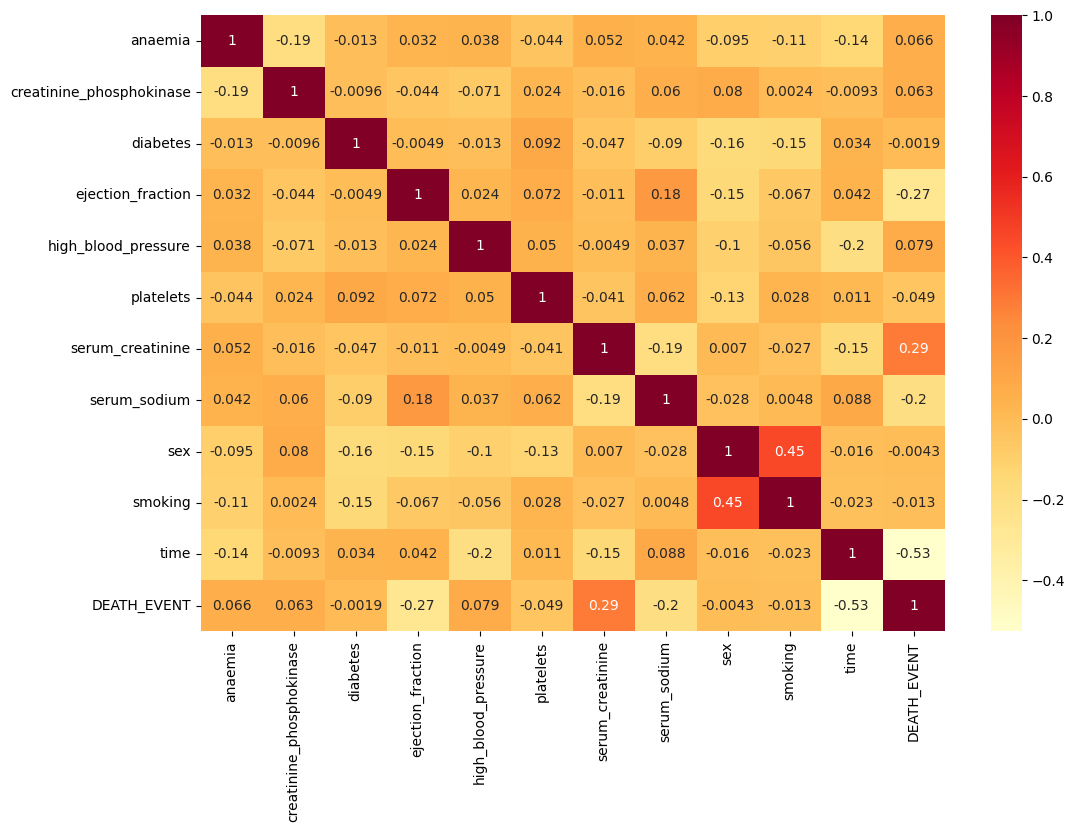

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
plt.show()

1. 데이터 로딩 결과:
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6         

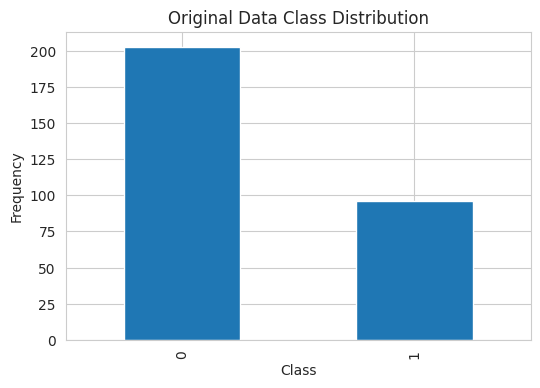

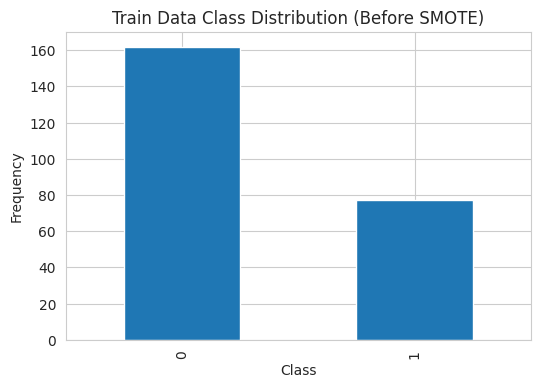

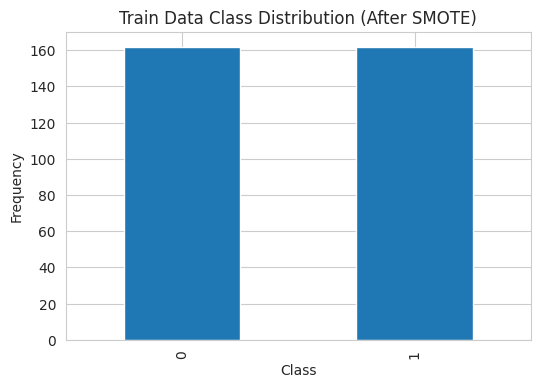

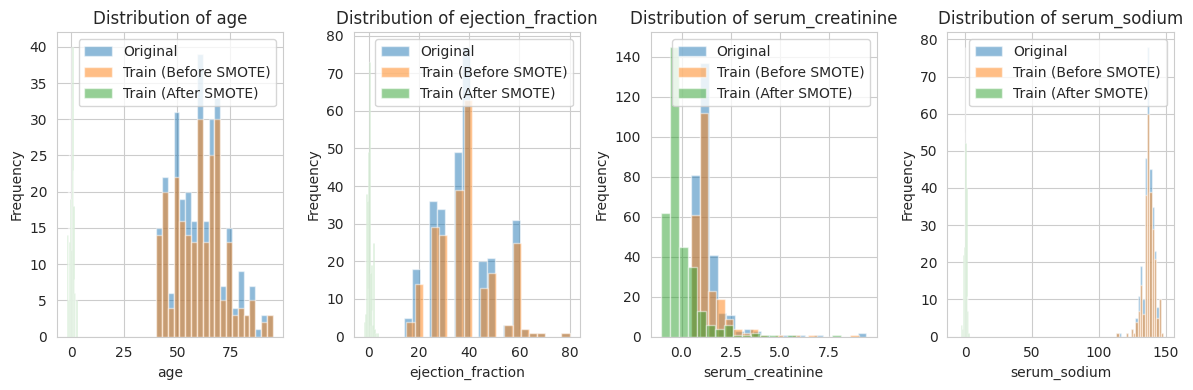

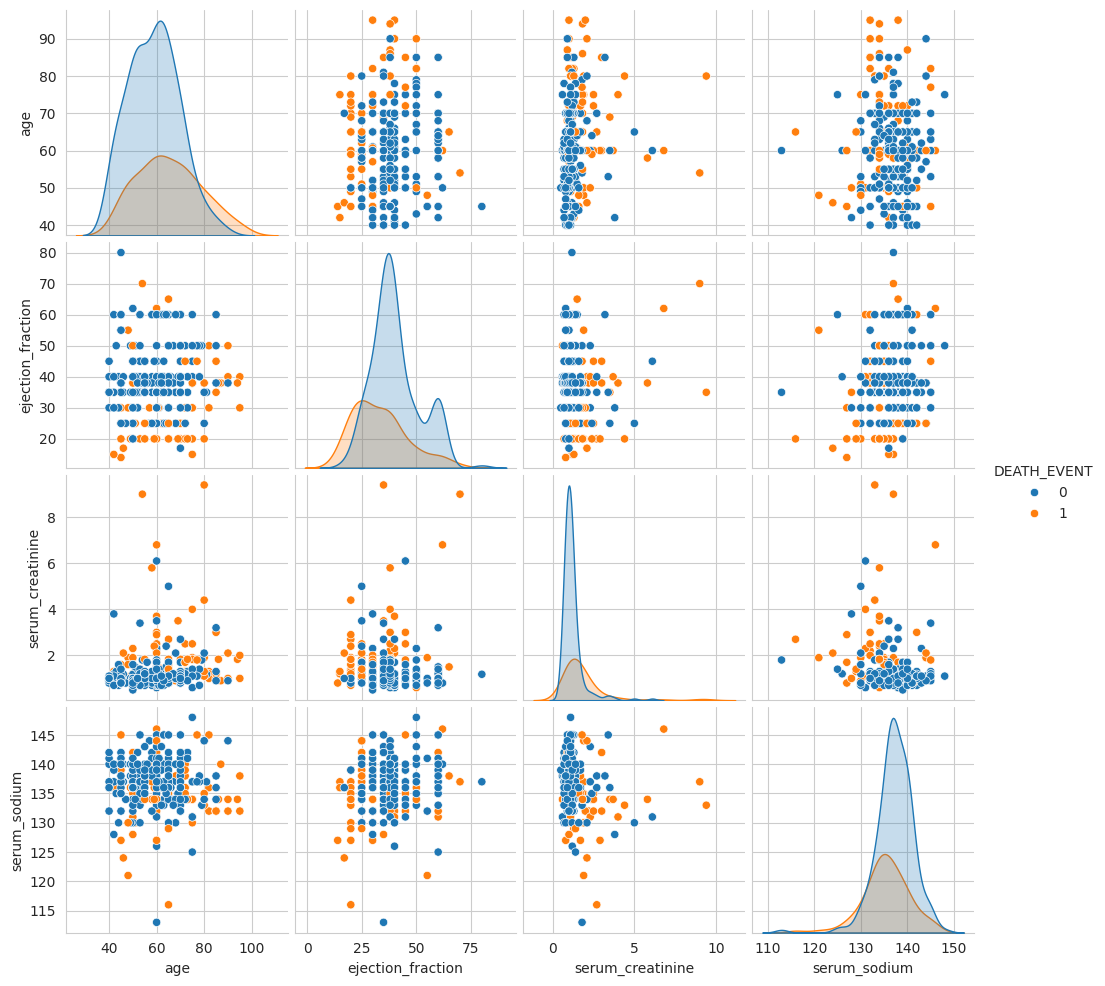

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn 추가
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# 1. 데이터 로딩
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print("1. 데이터 로딩 결과:\n", df.head())
print("\n데이터 크기:", df.shape)
print("\n클래스 비율:\n", df['DEATH_EVENT'].value_counts(normalize=True))

# 2. 데이터 전처리

# 2.1 범주형 변수 원-핫 인코딩
categorical_cols = ['sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\n2. 범주형 변수 원-핫 인코딩 결과:\n", df.head())

# 2.2 데이터 분리 (SMOTE 적용 전)
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)
print("\n2.2 데이터 분리 결과 (SMOTE 전):")
print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)
print("학습 데이터 클래스 비율:\n", y_train.value_counts(normalize=True))
print("테스트 데이터 클래스 비율:\n", y_test.value_counts(normalize=True))

# 2.3 SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns) # DataFrame으로 변환

print("\n2.3 SMOTE 적용 결과:")
print("SMOTE 적용 후 학습 데이터 크기:", X_train_resampled.shape)
print("SMOTE 적용 후 학습 데이터 클래스 비율:\n", pd.Series(y_train_resampled).value_counts(normalize=True))

# 2.4 데이터 스케일링
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 시각화 추가
def plot_class_distribution(y, title):
    plt.figure(figsize=(6, 4))
    y.value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

plot_class_distribution(y, "Original Data Class Distribution")
plot_class_distribution(y_train, "Train Data Class Distribution (Before SMOTE)")
plot_class_distribution(y_train_resampled, "Train Data Class Distribution (After SMOTE)")

# 추가 시각화
features_to_plot = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

sns.set_style("whitegrid")
plt.figure(figsize=(12, 4))

for i, feature in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot), i + 1)
    plt.hist(df[feature], bins=20, alpha=0.5, label='Original')
    plt.hist(X_train[feature], bins=20, alpha=0.5, label='Train (Before SMOTE)')

    feature_index = X_train.columns.get_loc(feature)
    plt.hist(X_train_resampled[:, feature_index], bins=20, alpha=0.5, label='Train (After SMOTE)')

    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

sns.pairplot(df[features_to_plot + ['DEATH_EVENT']], hue='DEATH_EVENT', diag_kind='kde')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Logistic Regression 결과:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.32      1.00      0.48        19

    accuracy                           0.32        60
   macro avg       0.16      0.50      0.24        60
weighted avg       0.10      0.32      0.15        60

AUC: 0.6649550706033376
Accuracy: 0.31666666666666665
Cross-validation scores: [0.81538462 0.83076923 0.87692308 0.89230769 0.84375   ]
Mean cross-validation score: 0.8518269230769231
--------------------


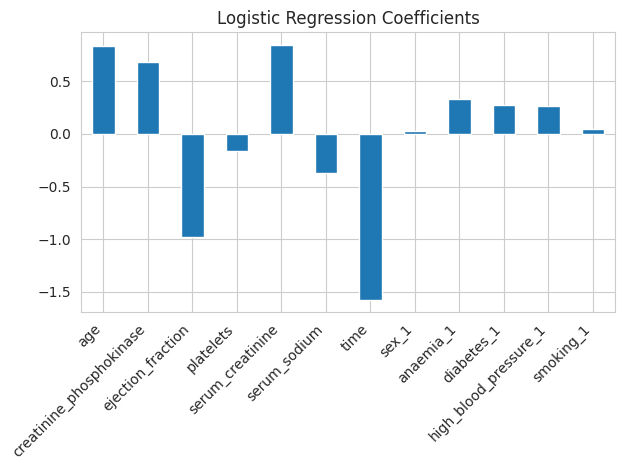

Decision Tree 결과:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.32      1.00      0.48        19

    accuracy                           0.32        60
   macro avg       0.16      0.50      0.24        60
weighted avg       0.10      0.32      0.15        60

AUC: 0.5
Accuracy: 0.31666666666666665
Cross-validation scores: [0.78461538 0.8        0.87692308 0.87692308 0.828125  ]
Mean cross-validation score: 0.8333173076923078
--------------------


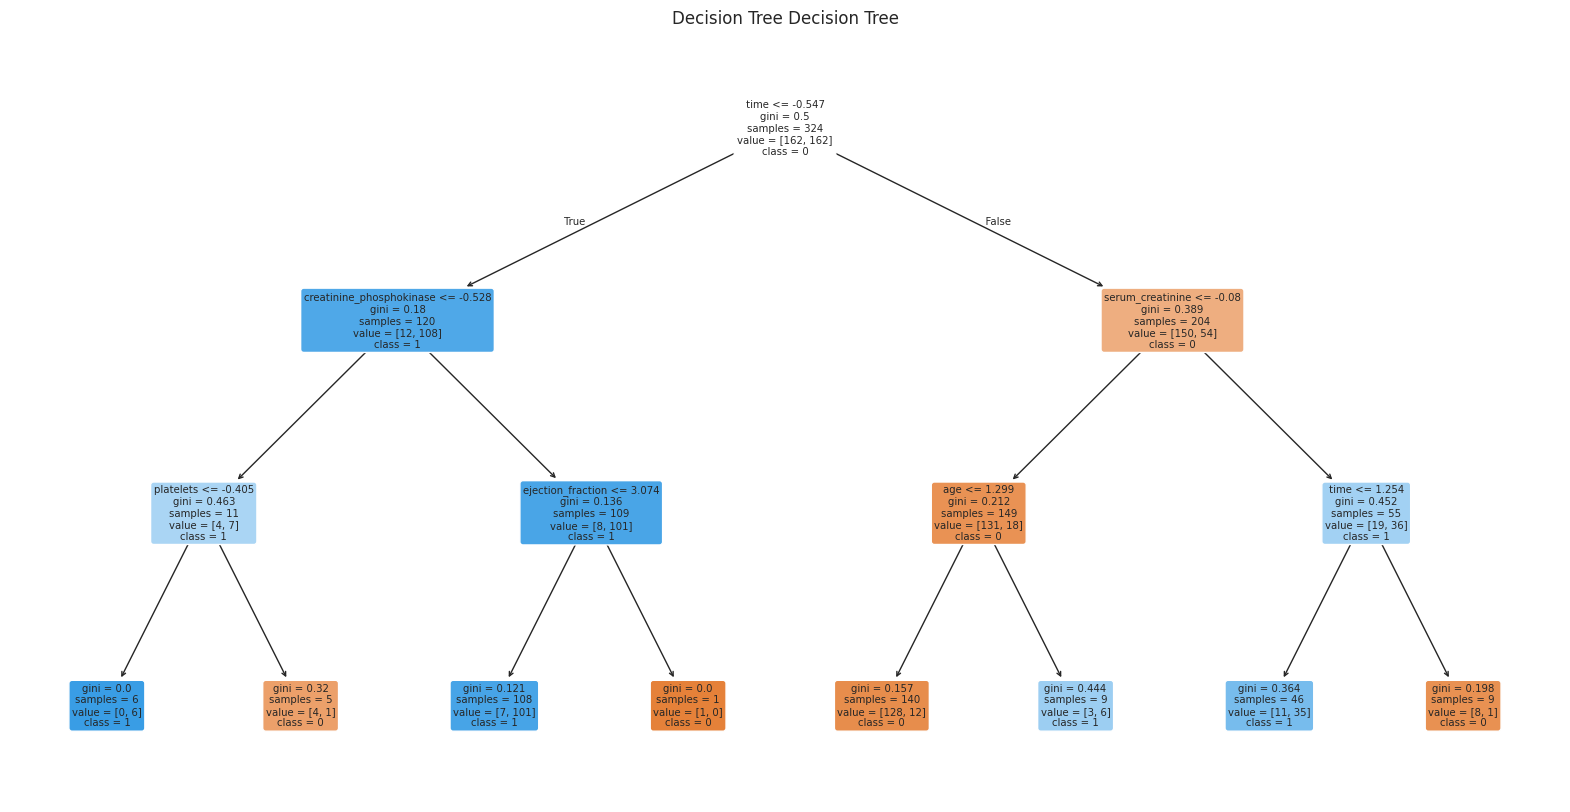

SVM 결과:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.32      1.00      0.48        19

    accuracy                           0.32        60
   macro avg       0.16      0.50      0.24        60
weighted avg       0.10      0.32      0.15        60

AUC: 0.5
Accuracy: 0.31666666666666665
Cross-validation scores: [0.76923077 0.8        0.86153846 0.89230769 0.8125    ]
Mean cross-validation score: 0.8271153846153847
--------------------
XGBoost 결과:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.32      1.00      0.48        19

    accuracy                           0.32        60
   macro avg       0.16      0.50      0.24        60
weighted avg       0.10      0.32      0.15        60

AUC: 0.6277278562259307
Accuracy: 0.31666666666666665
Cross-validation scores: [0.87692308 0.83076923 0.86153846 0.92307692 0.859375  ]


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import graphviz
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# 2.3 SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns) # DataFrame으로 유지


# 2.4 데이터 스케일링
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled_df)
X_test_scaled = scaler.transform(X_test)

# 모델 학습 및 평가 함수 (수정)
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name, X_train_original):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"{model_name} 결과:")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_prob)}")
    print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Mean cross-validation score: {scores.mean()}")
    print("-" * 20)

    # 시각화
    if model_name == "Logistic Regression":
        coef = pd.Series(model.coef_[0], index=X_train_original.columns)
        coef.plot(kind="bar")
        plt.title("Logistic Regression Coefficients")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    elif model_name == "Decision Tree":
        plt.figure(figsize=(20, 10))
        plot_tree(model, filled=True, feature_names=X_train_original.columns, class_names=['0', '1'], rounded=True)
        plt.title(f"{model_name} Decision Tree")
        plt.show()

# 모델 리스트
models = [
    (LogisticRegression(max_iter=1000, solver='liblinear'), "Logistic Regression"),
    (DecisionTreeClassifier(random_state=42, max_depth=3), "Decision Tree"),
    (SVC(probability=True), "SVM"),
    (XGBClassifier(random_state=42, max_depth=3), "XGBoost"), # use_label_encoder 제거
]

# 모델 학습 및 평가 (수정)
for model, model_name in models:
    train_and_evaluate(model, X_train_resampled_scaled, y_train_resampled, X_test_scaled, y_test, model_name, X_train_resampled_df)